In [1]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


In [26]:
bioclim = pd.read_csv('data/csv/bioclim.csv')
bioclim = bioclim.drop(columns=['Unnamed: 0'])
coords = bioclim[['lat', 'lon']]
bioclim = bioclim.drop(columns=['lat', 'lon'])
bioclim = bioclim[bioclim['bio_13']!=-3.4e+38]
bioclim['group'] = 'osmia'

In [27]:
america = pd.read_csv('data/csv/america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns=['Unnamed: 0'])
america = america[america['bio_13']!= -3.4e+38]
america = america.drop(columns=['lat', 'lon'])
america['group'] = 'america'

In [28]:
sahara = pd.read_csv('data/csv/sahara_bioclim_ndvi.csv')
sahara = sahara.drop(columns=['Unnamed: 0'])
sahara = sahara.drop(columns=['lat', 'lon'])
sahara['group'] = 'sahara'

In [29]:
siberia = pd.read_csv('data/csv/siberia_bioclim_ndvi.csv')
siberia = siberia.drop(columns=['Unnamed: 0'])
siberia = siberia.drop(columns=['lat', 'lon'])
siberia = siberia.dropna()
siberia['group'] = 'siberia'

In [30]:
column_order = bioclim.columns.tolist()
america = america[column_order]
sahara = sahara[column_order]
siberia = siberia[column_order]

In [31]:
combined = pd.concat([bioclim, america, siberia, sahara], ignore_index=True)
combined

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi,group
0,82.0,1.10,2.116667,29.925650,199,24.6,-2.3,125.0,18.533333,8.050000,...,9.683333,230.0,18.533333,710.95750,132.0,26.900000,36.0,230.0,0.157664,osmia
1,82.0,1.10,2.116667,29.925650,199,24.6,-2.3,125.0,18.533333,8.050000,...,9.683333,230.0,18.533333,710.95750,132.0,26.900000,36.0,230.0,0.157664,osmia
2,81.0,1.40,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,10.008333,227.0,18.816666,709.33014,125.0,27.000000,35.0,227.0,0.151344,osmia
3,81.0,1.40,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,10.008333,227.0,18.816666,709.33014,125.0,27.000000,35.0,227.0,0.151344,osmia
4,81.0,1.40,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,10.008333,227.0,18.816666,709.33014,125.0,27.000000,35.0,227.0,0.151344,osmia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33810,7.0,12.85,34.833332,37.915604,157,43.7,4.6,2.0,34.833332,14.825001,...,24.037500,16.0,14.850000,891.11810,13.0,39.100002,0.0,2.0,0.075699,sahara
33811,13.0,10.00,25.516666,43.637386,588,33.3,3.7,0.0,25.516666,12.916666,...,18.150000,33.0,10.000000,633.05896,33.0,29.599998,0.0,0.0,0.083983,sahara
33812,34.0,13.45,26.633333,45.172203,94,34.1,7.0,1.0,27.033333,12.241667,...,20.570833,88.0,15.233334,551.21954,86.0,27.099998,0.0,7.0,0.072469,sahara
33813,10.0,12.70,26.050000,46.698112,129,32.8,6.3,0.0,26.050000,12.375000,...,19.795834,25.0,12.700000,552.42630,25.0,26.500000,0.0,0.0,0.084076,sahara


In [35]:
combined_vars = combined.drop(columns=['group'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_vars)
combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
combined_scaled

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_12,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi
0,0.054939,-0.656488,-0.986884,-1.642531,0.419428,0.718409,-0.557046,-1.146336,0.787057,0.037321,...,-0.953352,-0.164609,-0.007223,1.550017,1.124914,-1.384436,0.828421,-1.200107,0.548951,-1.363572
1,0.054939,-0.656488,-0.986884,-1.642531,0.419428,0.718409,-0.557046,-1.146336,0.787057,0.037321,...,-0.953352,-0.164609,-0.007223,1.550017,1.124914,-1.384436,0.828421,-1.200107,0.548951,-1.363572
2,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
3,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
4,-0.012065,-0.542081,-0.888457,-1.473503,0.030016,0.882716,-0.492151,-1.318099,0.980854,0.154352,...,-1.102913,0.031134,-0.079114,1.606185,1.108983,-1.569969,0.855776,-1.308571,0.473451,-1.454134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33810,-4.970388,3.824482,7.795472,1.883715,0.219973,11.179288,1.681798,-5.371715,11.936114,5.983995,...,-6.163067,8.480726,-5.135446,0.819821,2.888558,-4.538505,4.165639,-5.104794,-5.189005,-2.538158
33811,-4.568362,2.737608,5.294536,4.408937,2.266761,5.483312,1.389775,-5.440420,5.563596,4.308978,...,-5.905490,4.934758,-4.728064,-0.141658,0.362342,-4.008409,1.566985,-5.104794,-5.239338,-2.419444
33812,-3.161271,4.053297,5.594291,5.086306,-0.079209,5.921464,2.460526,-5.406067,6.600983,3.716506,...,-5.174302,6.392796,-3.410063,0.895814,-0.438808,-2.603656,0.883129,-5.104794,-5.063173,-2.584444
33813,-4.769375,3.767278,5.437703,5.759743,0.087003,5.209467,2.233397,-5.440420,5.928391,3.833537,...,-6.163067,5.926023,-4.919773,0.393598,-0.426994,-4.220448,0.719004,-5.104794,-5.239338,-2.418111


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
pca.fit(combined_scaled)
df_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

explained_variance = pca.explained_variance_ratio_

print(df_pca)
print("Explained Variance Ratio:", explained_variance)

             PC1        PC2
0       3.526956  -0.501324
1       3.526956  -0.501324
2       3.742669  -0.013362
3       3.742669  -0.013362
4       3.742669  -0.013362
...          ...        ...
33810  14.029757  19.202249
33811  10.939763  15.362520
33812   9.095258  16.538285
33813   9.954092  17.438537
33814   7.890582  15.248955

[33815 rows x 2 columns]
Explained Variance Ratio: [0.33357281 0.26557954]


/home/mpgetz/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


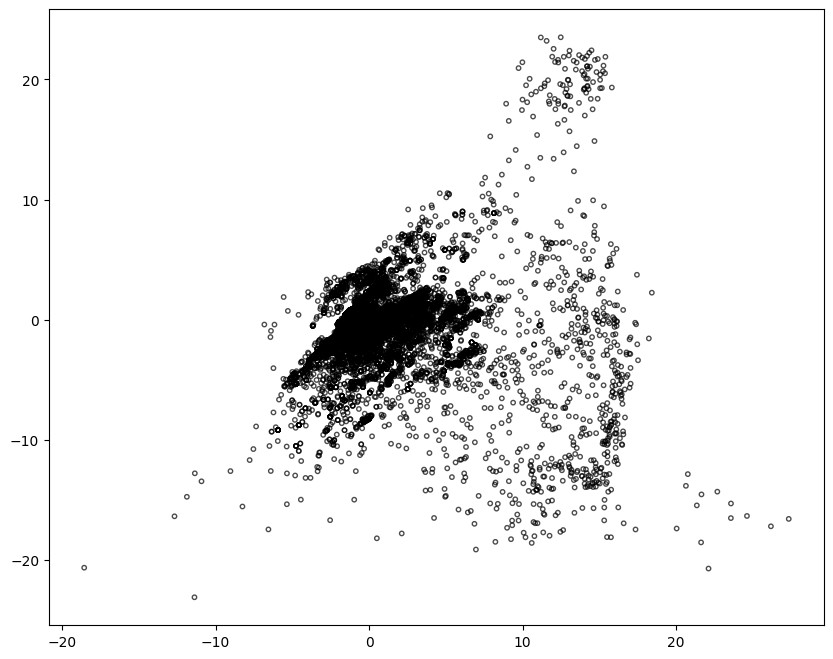

In [37]:
plt.figure(figsize=(10, 8))

plt.scatter(df_pca['PC1'], df_pca['PC2'], s=10, marker= 'o', facecolor='none', edgecolor='k', alpha=0.7)